__At the command line, from the directory of this notebook__

ipcluster start -n 8

In [6]:
%matplotlib inline
from IPython.parallel import Client
c = Client()

In [8]:
%%px --local
from skimage import io
from os import path
from matplotlib import pyplot as plt
import numpy as np
import os
import shutil

In [9]:
%%px --local
%run edges.py

In [10]:
def crop(file_name):
    in_file = path.join(in_path, file_name)
    out_file = path.join(out_path, file_name)
    
    eye = io.imread(in_file)
    cropped = crop_cv(eye)
    io.imsave(out_file, cropped)

Test it out:

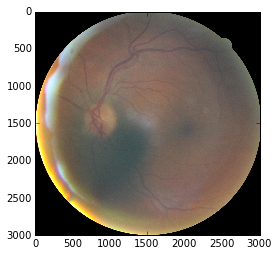

In [36]:
file_name = '21_left.jpeg'

#if path.exists(out_path):
#    shutil.rmtree(out_path)
#os.mkdir(out_path)

crop(file_name)
eye = io.imread(path.join(out_path, file_name))
plt.figure()
ax = plt.subplot(111)
ax.imshow(eye)
plt.show()

In [ ]:
%time
dv = Client()[:]
files = os.listdir(in_path)

if path.exists(out_path):
    shutil.rmtree(out_path)
os.mkdir(out_path)

asr = dv.map(crop, files)
asr.wait()

In [32]:
files_out = set(os.listdir(out_path))
diff = set(files).difference(files_out)
diff

{'23263_left.jpeg', '40118_left.jpeg'}

In [33]:
asr = dv.map(crop, diff)
asr.wait()